In [2]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from ast import literal_eval
import pickle
import pprint
from matplotlib.cbook import boxplot_stats
import numpy as np
pp = pprint.PrettyPrinter(depth=6)
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)
pd.set_option('display.max_columns', 150)

In [3]:
csv_folder = "../../csv"
figure_folder = "../../figures/jobs_analysis"

### Impor builds df

In [12]:
builds = pd.read_csv(f"{csv_folder}/builds_cleaned.csv", index_col=0)
builds["started_at"] = pd.to_datetime(builds.started_at, errors="coerce")
builds["finished_at"] = pd.to_datetime(builds.finished_at, errors="coerce")
builds.head()

,number,pull_request_number,id,event_type,finished_at,pull_request_title,started_at,duration,state,started_at_day,started_at_month,started_at_year
0,6995,NaN,99118995,push,2015-12-28 16:34:08+00:00,NaN,2015-12-28 16:18:41+00:00,5361.0,failed,28.0,12.0,2015.0
1,6994,NaN,99100662,push,2015-12-28 14:36:03+00:00,NaN,2015-12-28 14:18:30+00:00,5953.0,passed,28.0,12.0,2015.0
2,6993,NaN,99093472,push,2015-12-28 13:27:51+00:00,NaN,2015-12-28 13:11:39+00:00,5166.0,passed,28.0,12.0,2015.0
3,6992,NaN,99086186,push,2015-12-28 12:18:41+00:00,NaN,2015-12-28 12:10:56+00:00,5243.0,passed,28.0,12.0,2015.0
4,6991,NaN,99078711,push,2015-12-28 10:56:34+00:00,NaN,2015-12-28 10:41:16+00:00,5045.0,passed,28.0,12.0,2015.0


### Import jobs df

In [13]:
jobs = pd.read_csv(f"{csv_folder}/allJobs.csv", index_col=0)
jobs["finished_at"] = pd.to_datetime(jobs.finished_at)
jobs["started_at"] = pd.to_datetime(jobs.started_at)
jobs["created_at"] = pd.to_datetime(jobs.created_at)
jobs

,id,buildid,started_at,created_at,finished_at,number,state,updated_at,commitsha,commitid,commitmessage,commitref,commitcompare_url
0,241946101,241946099,2017-06-12 09:21:03+00:00,2017-06-12 09:13:51.063000+00:00,2017-06-12 09:21:43+00:00,25614.1,canceled,2018-06-02T14:51:19.734Z,2e4b539138fde6f664a865c81fb6ab0763f74bdb,70181895,SONAR-9304 Add test on organization deletion,refs/heads/feature/atlas/MMF-324/builtin-profiles,https://github.com/SonarSource/sonarqube/compa...
1,241946103,241946099,2017-06-12 09:22:43+00:00,2017-06-12 09:13:51.107000+00:00,2017-06-12 09:21:43+00:00,25614.2,canceled,2018-06-02T14:51:19.764Z,2e4b539138fde6f664a865c81fb6ab0763f74bdb,70181895,SONAR-9304 Add test on organization deletion,refs/heads/feature/atlas/MMF-324/builtin-profiles,https://github.com/SonarSource/sonarqube/compa...
2,241952024,241952022,2017-06-12 09:36:43+00:00,2017-06-12 09:32:52.227000+00:00,2017-06-12 09:37:23+00:00,25615.1,canceled,2018-06-02T14:51:25.661Z,464f5da96733c14818f4b4bfeb878951b859ee0c,70183628,SONAR-9304 Add comments to make tests clearer,refs/heads/feature/atlas/MMF-324/builtin-profiles,https://github.com/SonarSource/sonarqube/compa...
3,241952025,241952022,NaT,2017-06-12 09:32:52.237000+00:00,2017-06-12 09:37:24+00:00,25615.2,canceled,2018-06-02T14:51:25.669Z,464f5da96733c14818f4b4bfeb878951b859ee0c,70183628,SONAR-9304 Add comments to make tests clearer,refs/heads/feature/atlas/MMF-324/builtin-profiles,https://github.com/SonarSource/sonarqube/compa...
4,241952045,241952044,2017-06-12 09:42:16+00:00,2017-06-12 09:32:59.994000+00:00,2017-06-12 09:53:48+00:00,25616.1,passed,2018-06-02T14:51:26.125Z,7358e9a93e47ac9fcaebe960c00ab8bd28e9890e,70183633,SONAR-9304 Add comments to make tests clearer,refs/pull/2104/merge,https://github.com/SonarSource/sonarqube/pull/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136978,315411337,315411335,2017-12-12 15:23:15+00:00,2017-12-12 15:22:41.091000+00:00,2017-12-12 15:26:39+00:00,34811.2,passed,2018-06-03T16:57:36.971Z,abd0650045b3fcc95ac8459a6fc2450a1bd889c0,93642638,SONAR-10134 Fix ITs on quality gates by settin...,refs/pull/2866/merge,https://github.com/SonarSource/sonarqube/pull/...
136979,315421139,315421138,2017-12-12 15:43:05+00:00,2017-12-12 15:42:34.642000+00:00,2017-12-12 15:44:59+00:00,34812.1,passed,2018-06-03T16:57:47.762Z,04d5e19040df59e2a4a1025514c9b8b7c42378f8,93645831,SONAR-10187 Provide more options to populate e...,refs/heads/feature/stas/MMF-1128,https://github.com/SonarSource/sonarqube/compa...
136980,315421140,315421138,2017-12-12 15:43:26+00:00,2017-12-12 15:42:34.682000+00:00,2017-12-12 15:44:25+00:00,34812.2,passed,2018-06-03T16:57:47.778Z,04d5e19040df59e2a4a1025514c9b8b7c42378f8,93645831,SONAR-10187 Provide more options to populate e...,refs/heads/feature/stas/MMF-1128,https://github.com/SonarSource/sonarqube/compa...
136981,315421147,315421146,2017-12-12 15:43:25+00:00,2017-12-12 15:42:40.583000+00:00,2017-12-12 16:01:05+00:00,34813.1,passed,2018-06-03T16:57:47.837Z,a5005e0ca38a67e7d70c255154990ed10be31020,93645838,SONAR-10187 Provide more options to populate e...,refs/pull/2895/merge,https://github.com/SonarSource/sonarqube/pull/...


In [21]:
build_job = builds.merge(jobs, left_on="id", right_on="buildid", suffixes=["_build", "_job"])
build_job.head()

,number_build,pull_request_number,id_build,event_type,finished_at_build,pull_request_title,started_at_build,duration,state_build,started_at_day_build,started_at_month_build,started_at_year_build,id_job,buildid,started_at_job,created_at,finished_at_job,number_job,state_job,updated_at,commitsha,commitid,commitmessage,commitref,commitcompare_url,started_at_day_job,started_at_month_job,started_at_year_job
0,6995,NaN,99118995,push,2015-12-28 16:34:08+00:00,NaN,2015-12-28 16:18:41+00:00,5361.0,failed,28.0,12.0,2015.0,99118996,99118995,2015-12-28 16:18:43+00:00,2015-12-28 16:18:33.261000+00:00,2015-12-28 16:29:34+00:00,6995.1,passed,2018-05-29T22:02:47.694Z,be413c15c08966da5740a126e1c5b52f75e6fc6e,28112504,improve code page rendering,refs/heads/master,https://github.com/SonarSource/sonarqube/compa...,28.0,12.0,2015.0
1,6995,NaN,99118995,push,2015-12-28 16:34:08+00:00,NaN,2015-12-28 16:18:41+00:00,5361.0,failed,28.0,12.0,2015.0,99118997,99118995,2015-12-28 16:18:41+00:00,2015-12-28 16:18:33.279000+00:00,2015-12-28 16:34:08+00:00,6995.2,passed,2018-05-29T22:02:47.753Z,be413c15c08966da5740a126e1c5b52f75e6fc6e,28112504,improve code page rendering,refs/heads/master,https://github.com/SonarSource/sonarqube/compa...,28.0,12.0,2015.0
2,6995,NaN,99118995,push,2015-12-28 16:34:08+00:00,NaN,2015-12-28 16:18:41+00:00,5361.0,failed,28.0,12.0,2015.0,99118998,99118995,2015-12-28 16:18:41+00:00,2015-12-28 16:18:33.295000+00:00,2015-12-28 16:33:47+00:00,6995.3,passed,2018-05-29T22:02:47.790Z,be413c15c08966da5740a126e1c5b52f75e6fc6e,28112504,improve code page rendering,refs/heads/master,https://github.com/SonarSource/sonarqube/compa...,28.0,12.0,2015.0
3,6995,NaN,99118995,push,2015-12-28 16:34:08+00:00,NaN,2015-12-28 16:18:41+00:00,5361.0,failed,28.0,12.0,2015.0,99118999,99118995,2015-12-28 16:18:43+00:00,2015-12-28 16:18:33.312000+00:00,2015-12-28 16:34:04+00:00,6995.4,passed,2018-05-29T22:02:47.798Z,be413c15c08966da5740a126e1c5b52f75e6fc6e,28112504,improve code page rendering,refs/heads/master,https://github.com/SonarSource/sonarqube/compa...,28.0,12.0,2015.0
4,6995,NaN,99118995,push,2015-12-28 16:34:08+00:00,NaN,2015-12-28 16:18:41+00:00,5361.0,failed,28.0,12.0,2015.0,99119000,99118995,2015-12-28 16:18:42+00:00,2015-12-28 16:18:33.332000+00:00,2015-12-28 16:31:37+00:00,6995.5,passed,2018-05-29T22:02:15.403Z,be413c15c08966da5740a126e1c5b52f75e6fc6e,28112504,improve code page rendering,refs/heads/master,https://github.com/SonarSource/sonarqube/compa...,28.0,12.0,2015.0


### Columns

In [9]:
jobs.columns

Index(['id', 'buildid', 'started_at', 'created_at', 'finished_at', 'number',
       'state', 'updated_at', 'commitsha', 'commitid', 'commitmessage',
       'commitref', 'commitcompare_url'],
      dtype='object')

| Field          | Description                                                     |
|----------------|-----------------------------------------------------------------|
|commitref|Named reference the commit has in git.|


In [11]:
jobs = jobs[['id', 'buildid', 'started_at', 'created_at', 'finished_at', 'number',
       'state', 'updated_at', 'commitsha','commitmessage','commitref']]

### Shape

In [12]:
jobs.shape

(136983, 11)

### Stats

In [9]:
jobs.describe()

,id,buildid,number,commitid
count,1.369830e+05,1.369830e+05,136983.000000,1.369830e+05
mean,1.605672e+08,1.605672e+08,14131.256792,4.639438e+07
std,9.339884e+07,9.339884e+07,10802.638198,2.808363e+07
min,5.473113e+07,5.473112e+07,1.100000,1.569590e+07
25%,8.808975e+07,8.808973e+07,5702.850000,2.505123e+07
50%,1.280068e+08,1.280068e+08,9894.400000,3.622591e+07
75%,2.212873e+08,2.212873e+08,21510.650000,6.380080e+07
max,7.313960e+08,7.313960e+08,39427.200000,2.259581e+08


In [10]:
jobs.describe(include = ['O'])

,state,updated_at,commitsha,commitmessage,commitref,commitcompare_url
count,136983,136983,136983,136981,133102,136983
unique,4,136648,35379,12525,6897,27721
top,passed,2018-05-29T17:22:53.645Z,e4faa1fdb6c34ec8dcc65c5916daea0bb5c15dcd,Nightly build launched from the travis-schedul...,refs/heads/master,https://github.com/SonarSource/sonarqube/compa...
freq,98116,2,557,2070,24092,555


* Number field seems to be so composed: buildnumber.numberofjob. It goes indeed from 1.1 to 39427.2
* The majority of jobs have the passed state
* "Nightly build launched from the travis" is the most popular commitmessage

**Missing values**

In [11]:
jobs.isna().sum()

id                      0
buildid                 0
started_at           9876
created_at              0
finished_at             1
number                  0
state                   0
updated_at              0
commitsha               0
commitid                0
commitmessage           2
commitref            3881
commitcompare_url       0
dtype: int64

* Started at has many NaN (to be investigated)
* Finished at has 1 NaN (to be investigated)
* Commit message and commit ref also present missing values

### Time range

In [12]:
jobs.started_at.min()

Timestamp('2015-03-17 15:04:32+0000', tz='UTC')

In [13]:
jobs.started_at.max()

Timestamp('2020-09-29 20:09:13+0000', tz='UTC')

These values are the same as the ones from builds which validates the dataset

**Time distribution**

In [16]:
jobs["started_at_day"] = jobs.started_at.dt.day
jobs["started_at_month"] = jobs.started_at.dt.month
jobs["started_at_year"] = jobs.started_at.dt.year

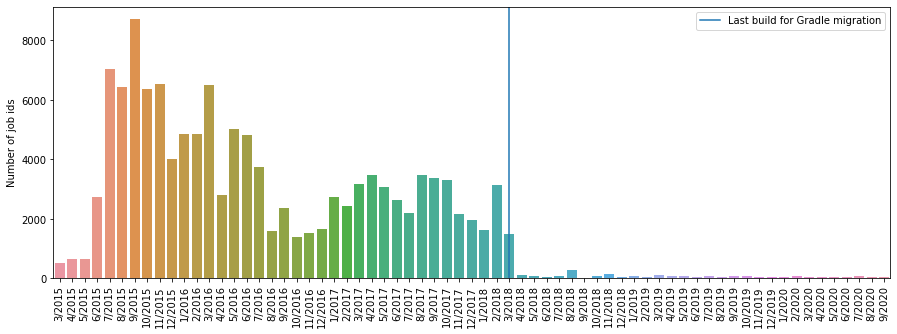

In [26]:
plt.figure()
time_group = ["started_at_year", "started_at_month"]
x = jobs.groupby(time_group).id.count().reset_index().sort_values(by=time_group)
ax = sns.barplot(x=x.index, y=x.id)
ax.set_xticklabels(list(x.started_at_month.astype(int).astype(str) + "/" + x.started_at_year.astype(int).astype(str)),
                  rotation=90)
ax.axvline(x=36, label="Last build for Gradle migration")
ax.set(ylabel="Number of job ids")
plt.legend()
plt.savefig(f"{figure_folder}/jobs_over_time.png", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

There has been a decrease of number of jobs per month after 3/2018. This can possibly be due to the change identified in the builds dataset as well. The distribution is however different. There has been a decrease of number of jobs after the peak of 9/2015. Possibly this is due to new configuration of Travis which reduced the number of jobs per build.

### Commitref

In [16]:
x = jobs[jobs.commitref.isna()]

In [17]:
x.started_at.min()

Timestamp('2015-10-30 12:15:44+0000', tz='UTC')

In [18]:
x.started_at.max()

Timestamp('2017-05-23 19:34:46+0000', tz='UTC')

The lack of commitref seems to be confined between 10/2015 and 5/2017

In [19]:
jobs[jobs.commitref.isna()].head()

,id,buildid,started_at,created_at,finished_at,number,state,updated_at,commitsha,commitid,commitmessage,commitref,commitcompare_url,started_at_day,started_at_month,started_at_year
2308,146279261,146279260,2016-07-21 03:39:01+00:00,2016-07-21 03:24:49.043000+00:00,2016-07-21 04:15:09+00:00,12014.1,passed,2018-05-31T03:29:31.334Z,ca4b66297fe5350b67c3baa9cebf75841fda9dcd,41510230,Nightly build launched from the travis-schedul...,NaN,https://github.com/SonarSource/sonarqube/compa...,21.0,7.0,2016.0
2309,146279262,146279260,2016-07-21 03:39:56+00:00,2016-07-21 03:24:49.057000+00:00,2016-07-21 03:45:38+00:00,12014.2,passed,2018-05-31T03:29:31.432Z,ca4b66297fe5350b67c3baa9cebf75841fda9dcd,41510230,Nightly build launched from the travis-schedul...,NaN,https://github.com/SonarSource/sonarqube/compa...,21.0,7.0,2016.0
2398,146548710,146548709,2016-07-22 03:13:54+00:00,2016-07-22 03:13:45.357000+00:00,2016-07-22 03:47:13+00:00,12047.1,passed,2018-05-31T03:39:07.551Z,1bb0e1cfd1aa5f2de1d20d6d9a10af3803dde057,41589327,Nightly build launched from the travis-schedul...,NaN,https://api.github.com/repos/SonarSource/sonar...,22.0,7.0,2016.0
2399,146548711,146548709,2016-07-22 03:13:53+00:00,2016-07-22 03:13:45.375000+00:00,2016-07-22 03:20:02+00:00,12047.2,passed,2018-05-31T03:39:07.602Z,1bb0e1cfd1aa5f2de1d20d6d9a10af3803dde057,41589327,Nightly build launched from the travis-schedul...,NaN,https://api.github.com/repos/SonarSource/sonar...,22.0,7.0,2016.0
2442,146804543,146804542,2016-07-23 03:25:12+00:00,2016-07-23 03:19:27.981000+00:00,2016-07-23 03:58:42+00:00,12064.1,failed,2018-05-31T03:46:02.040Z,d6f3a7089e255bca1a286b980ff49b9a7d72c96b,41664745,Nightly build launched from the travis-schedul...,NaN,https://api.github.com/repos/SonarSource/sonar...,23.0,7.0,2016.0


In [20]:
jobs[jobs.commitref.isna()].commitmessage.value_counts().head(5)

Nightly build launched from the travis-scheduler job on AppVeyor    2070
Print memory and CPU info                                            555
BUILD: fix travis install                                            275
Merge branch 'test/dr/travis-premium-vms-mt' into test/tv/ramfs      230
set ramdisk size to 3584m                                            225
Name: commitmessage, dtype: int64

Looking at some of these jobs and their commit messages did not help, other than showing that this may have something to do with experiments on travis (*Nightly build launched from the travis-scheduler job on AppVeyor* being the most common message). 

An explanation of what git refs are can be found [here](https://www.atlassian.com/git/tutorials/refs-and-the-reflog). They are a more human friendly way of referring to commits. Branches and tags are examples of git refs. A possible explanation for missing git refs is that builds have been triggered in a different way other than directly from github and therefore could not fetch the git ref.

In [21]:
build_job[build_job.commitref.isna()].event_type.describe()

count     3881
unique       1
top        api
freq      3881
Name: event_type, dtype: object

Yes, indeed all missing values for gitref are due to builds triggered from the apis.

#### Merge requests

In [22]:
jobs[jobs.commitref.str.contains("merge").fillna(False)]

,id,buildid,started_at,created_at,finished_at,number,state,updated_at,commitsha,commitid,commitmessage,commitref,commitcompare_url,started_at_day,started_at_month,started_at_year
4,241952045,241952044,2017-06-12 09:42:16+00:00,2017-06-12 09:32:59.994000+00:00,2017-06-12 09:53:48+00:00,25616.1,passed,2018-06-02T14:51:26.125Z,7358e9a93e47ac9fcaebe960c00ab8bd28e9890e,70183633,SONAR-9304 Add comments to make tests clearer,refs/pull/2104/merge,https://github.com/SonarSource/sonarqube/pull/...,12.0,6.0,2017.0
5,241952046,241952044,2017-06-12 09:42:15+00:00,2017-06-12 09:33:00.012000+00:00,2017-06-12 09:46:56+00:00,25616.2,passed,2018-06-02T14:51:26.134Z,7358e9a93e47ac9fcaebe960c00ab8bd28e9890e,70183633,SONAR-9304 Add comments to make tests clearer,refs/pull/2104/merge,https://github.com/SonarSource/sonarqube/pull/...,12.0,6.0,2017.0
10,241956742,241956741,2017-06-12 09:50:26+00:00,2017-06-12 09:48:54.652000+00:00,2017-06-12 10:01:41+00:00,25619.1,passed,2018-06-02T14:51:48.061Z,0110c87fd42c510bb2c2f7a274d654a9fb07fb29,70185025,SONAR-9363 Create a step to choose the technology,refs/pull/2137/merge,https://github.com/SonarSource/sonarqube/pull/...,12.0,6.0,2017.0
11,241956743,241956741,2017-06-12 09:50:05+00:00,2017-06-12 09:48:54.668000+00:00,2017-06-12 09:56:17+00:00,25619.2,passed,2018-06-02T14:51:48.184Z,0110c87fd42c510bb2c2f7a274d654a9fb07fb29,70185025,SONAR-9363 Create a step to choose the technology,refs/pull/2137/merge,https://github.com/SonarSource/sonarqube/pull/...,12.0,6.0,2017.0
16,241974655,241974654,2017-06-12 10:51:36+00:00,2017-06-12 10:50:32.392000+00:00,2017-06-12 11:07:10+00:00,25622.1,passed,2018-06-02T14:52:14.919Z,baf18566bc2af9cab1c72b851ce9e08d3714c731,70190644,UI: SONAR-9355 Create onboarding tutorial (#2137),refs/pull/2133/merge,https://github.com/SonarSource/sonarqube/pull/...,12.0,6.0,2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136972,315405756,315405752,2017-12-12 15:12:33+00:00,2017-12-12 15:10:55.648000+00:00,2017-12-12 15:15:50+00:00,34808.2,passed,2018-06-03T16:57:40.899Z,d5d89b2374ccc4cb60fabf479ad884ff25936dd1,93640716,Fix unit test,refs/pull/2866/merge,https://github.com/SonarSource/sonarqube/pull/...,12.0,12.0,2017.0
136977,315411336,315411335,2017-12-12 15:23:11+00:00,2017-12-12 15:22:41.077000+00:00,2017-12-12 15:40:32+00:00,34811.1,passed,2018-06-03T16:57:36.963Z,abd0650045b3fcc95ac8459a6fc2450a1bd889c0,93642638,SONAR-10134 Fix ITs on quality gates by settin...,refs/pull/2866/merge,https://github.com/SonarSource/sonarqube/pull/...,12.0,12.0,2017.0
136978,315411337,315411335,2017-12-12 15:23:15+00:00,2017-12-12 15:22:41.091000+00:00,2017-12-12 15:26:39+00:00,34811.2,passed,2018-06-03T16:57:36.971Z,abd0650045b3fcc95ac8459a6fc2450a1bd889c0,93642638,SONAR-10134 Fix ITs on quality gates by settin...,refs/pull/2866/merge,https://github.com/SonarSource/sonarqube/pull/...,12.0,12.0,2017.0
136981,315421147,315421146,2017-12-12 15:43:25+00:00,2017-12-12 15:42:40.583000+00:00,2017-12-12 16:01:05+00:00,34813.1,passed,2018-06-03T16:57:47.837Z,a5005e0ca38a67e7d70c255154990ed10be31020,93645838,SONAR-10187 Provide more options to populate e...,refs/pull/2895/merge,https://github.com/SonarSource/sonarqube/pull/...,12.0,12.0,2017.0


### Most common commit message

In [23]:
jobs.commitmessage.mode()[0]

'Nightly build launched from the travis-scheduler job on AppVeyor'

In [24]:
jobs[jobs.commitmessage==jobs.commitmessage.mode()[0]].started_at.min()

Timestamp('2015-10-30 12:15:44+0000', tz='UTC')

In [25]:
jobs[jobs.commitmessage==jobs.commitmessage.mode()[0]].started_at.max()

Timestamp('2016-10-11 03:13:39+0000', tz='UTC')

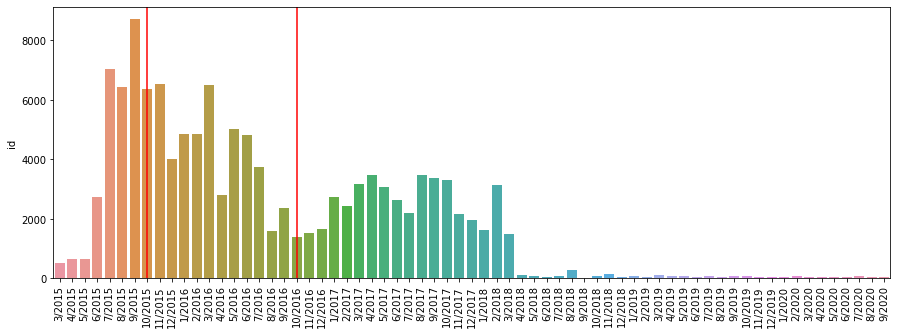

In [26]:
time_group = ["started_at_year", "started_at_month"]
x = jobs.groupby(time_group).id.count().reset_index().sort_values(by=time_group)
ax = sns.barplot(x=x.index, y=x.id)
ax.set_xticklabels(list(x.started_at_month.astype(int).astype(str) + "/" + x.started_at_year.astype(int).astype(str)),
                  rotation=90)
min_date = jobs[jobs.commitmessage==jobs.commitmessage.mode()[0]].started_at.min()
max_date = jobs[jobs.commitmessage==jobs.commitmessage.mode()[0]].started_at.max()
plt.axvline(7, 0, 10, color="r")
plt.axvline(19, 0, 10, color="r")
plt.show()

The influence of the commitmessage on the number of builds does not seem to be clear

In [27]:
jobs[jobs.commitmessage==jobs.commitmessage.mode()[0]].commitsha.nunique()

219

In [28]:
jobs[jobs.commitmessage==jobs.commitmessage.mode()[0]].commitref.nunique()

0

This commit message is associated with 219 unique sha but no commitref. From previous investigation on commitref we know that this means builds triggered via APIs. *Nightly builds launched from the travis-scheduler job* seems to have been a recursive build.

### Number of jobs per build

**Average**

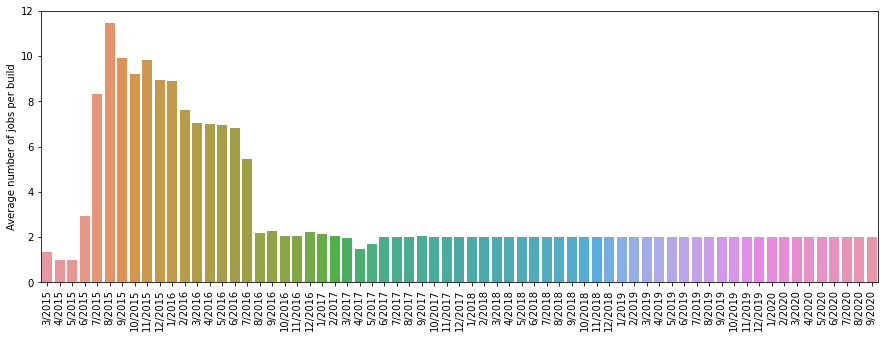

In [27]:
plt.figure()
time_group = ["started_at_year_build", "started_at_month_build"]
x = build_job.groupby(["id_build"] + time_group).id_job.count().reset_index()\
    .groupby(time_group).mean().reset_index().sort_values(by=time_group)
ax = sns.barplot(x=x.index, y=x.id_job)
ax.set(ylabel="Average number of jobs per build")
ax.set_xticklabels(list(x[time_group[1]].astype(int).astype(str) + "/" + x[time_group[0]].astype(int).astype(str)),
                  rotation=90)
plt.savefig(f"{figure_folder}/jobs_per_build_mean.png", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

**Maximum**

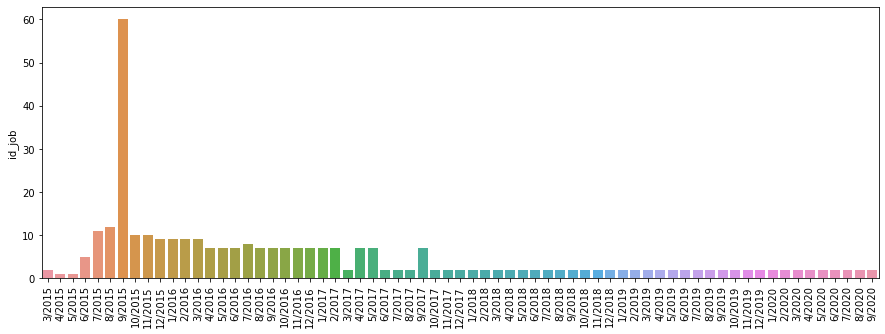

In [23]:
time_group = ["started_at_year_build", "started_at_month_build"]
x = build_job.groupby(["id_build"] + time_group).id_job.count().reset_index()\
    .groupby(time_group).max().reset_index().sort_values(by=time_group)
ax = sns.barplot(x=x.index, y=x.id_job)
ax.set_xticklabels(list(x[time_group[1]].astype(int).astype(str) + "/" + x[time_group[0]].astype(int).astype(str)),
                  rotation=90)
plt.show()

**Minimum**

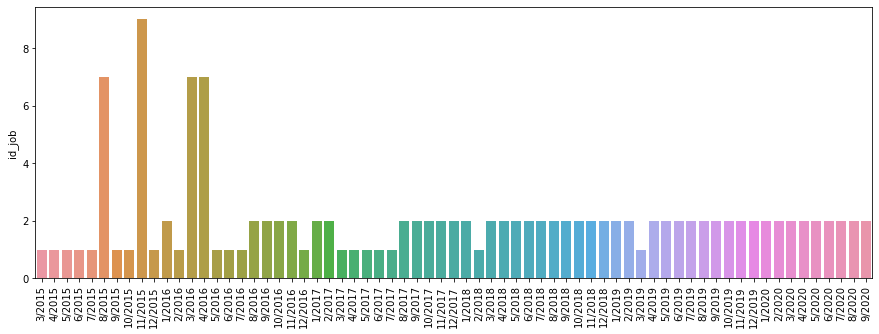

In [24]:
time_group = ["started_at_year_build", "started_at_month_build"]
x = build_job.groupby(["id_build"] + time_group).id_job.count().reset_index()\
    .groupby(time_group).min().reset_index().sort_values(by=time_group)
ax = sns.barplot(x=x.index, y=x.id_job)
ax.set_xticklabels(list(x[time_group[1]].astype(int).astype(str) + "/" + x[time_group[0]].astype(int).astype(str)),
                  rotation=90)
plt.show()

* The average number of jobs per build has not been constant througout the years. It has been however stable around 2 after 7/2016. 
*Minimum values show similar behavior, somewhat stabilizing after 7/2016 
* Maximum stabilizes a bit later, after 5/2017.

### State

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='state', ylabel='count'>

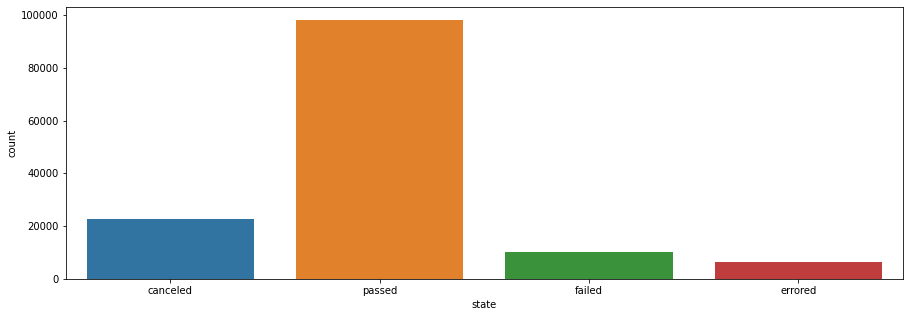

In [28]:
sns.countplot(jobs.state)

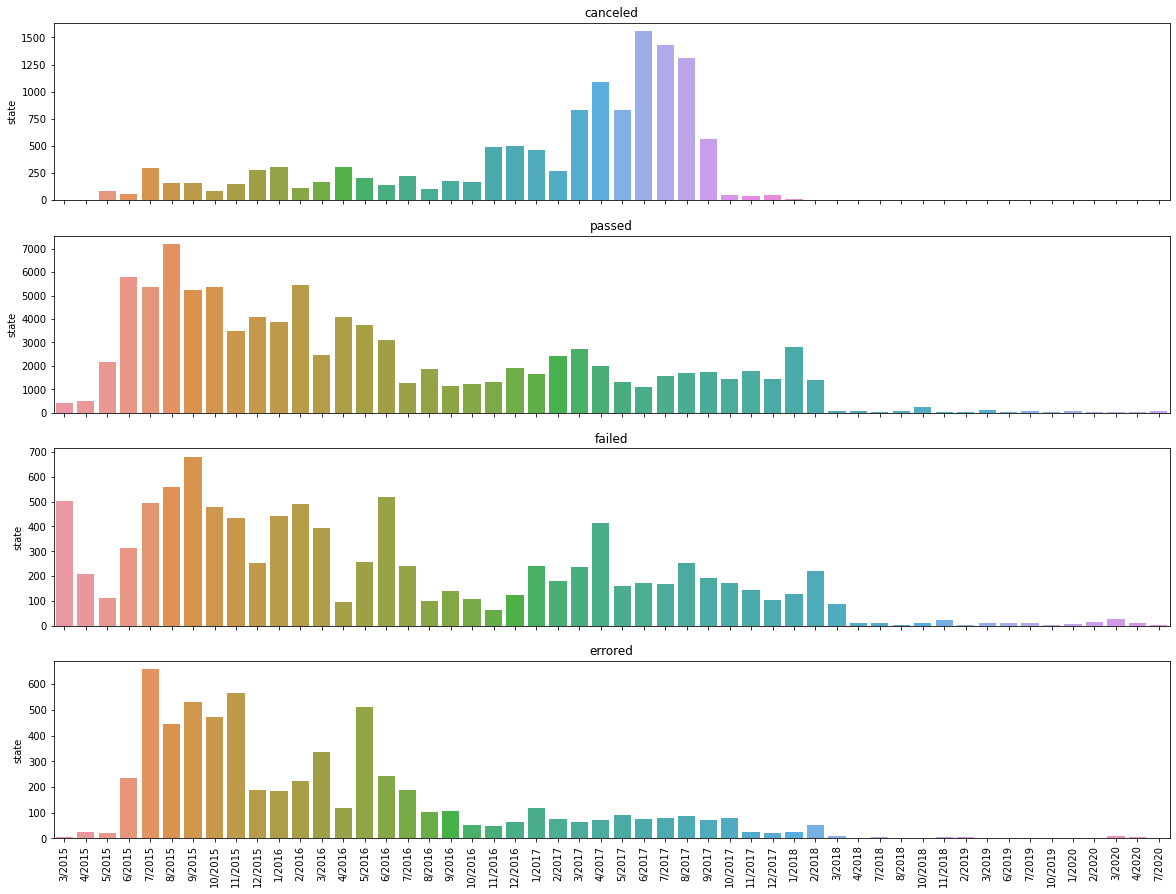

In [29]:
time_group = ["started_at_year", "started_at_month"]
f, axes = plt.subplots(jobs.state.nunique(), 1, sharex=True, figsize=(20,15))
for i, state in enumerate(jobs.state.unique()):
    x = jobs[jobs.state == state].groupby(time_group).count().reset_index()
    ax = sns.barplot(x=x.index, y=x.state, ax=axes[i])
    ax.set_xticklabels(list(x[time_group[1]].astype(int).astype(str) + "/" + x[time_group[0]].astype(int).astype(str)),
                  rotation=90)
    ax.set_title(state)

* Canceled and errored seems to have almost dissapeared after x
* Canceled have had a spike right before x, maybe a sign of changes in the CI process

### Time

**Started_at missing values**

In [32]:
jobs[jobs.started_at.isna()].state.value_counts()

canceled    9865
passed         8
failed         2
errored        1
Name: state, dtype: int64

In [31]:
9865/9876

0.9988861887403807

In [ ]:
build_job[(build_job.started_at_job.isna()) & (build_job.state_job != "canceled")]

* The started_at missing values are mainly due to canceled jobs (9865/9676)
* In the remaining ones with NaN started_at it is not clear what may have caused this missing value. Some of the builds associated also are missing the started_at field (all in failed state), not all though.
* It is therefore not clear how to address these missing values, and if they are errors or should be kept as they are

**Finished_at missing values**

In [ ]:
jobs[jobs.finished_at.isna()]

* The only finished_at missing value is a canceled job. This may be the reason

**Started_at and created_at difference**

Does started_at come before created_at?

In [ ]:
jobs["started_created_difference_seconds"] = (jobs.started_at - jobs.created_at) / np.timedelta64(1, 's')

In [ ]:
(jobs.started_created_difference_seconds < 0).sum()

In [ ]:
(jobs.started_created_difference_seconds > 0).sum()

In [ ]:
(jobs.started_created_difference_seconds == 0).sum()

In 126661 cases, jobs are created first and then started.

In [ ]:
sns.boxplot(jobs.started_created_difference_seconds)

**Highest difference job**

In [ ]:
jobs.loc[jobs.started_created_difference_seconds.idxmax()]

In [ ]:
jobs[jobs.started_created_difference_seconds> 1000000].commitref.unique()

In [ ]:
jobs[jobs.started_created_difference_seconds> 1000000].commitsha.unique()

**Distribution of outliers of started-created timestamps**

In [ ]:
outlier_thredshold = boxplot_stats(jobs.started_created_difference_seconds.dropna())[0]["fliers"].min()

In [ ]:
started_created_positive_ourliers = jobs[jobs.started_created_difference_seconds >= outlier_thredshold]

**Positive difference outliers**

In [ ]:
sns.countplot(started_created_positive_ourliers.state)

**Negative difference outliers**

In [ ]:
sns.distplot(started_created_negative_ourliers.started_created_difference_seconds)

In [ ]:
jobs[jobs.started_created_difference_seconds < 8].head()

In [ ]:
started_created_negative_ourliers = jobs[jobs.started_created_difference_seconds < 0]
sns.countplot(started_created_negative_ourliers.state)

* The distribution presents outliers
* Some of the positive outliers (where started > created) present very high values (>1000000). They seem to affect only few specific commit messages and refs: maybe these tasks have been deprioritized and long lasting jobs which had to wait for all the other prioritized jobs to run
* Negative outliers range from -15 to close to 0 seconds. This may be due to a small TravisCI delay in registering the job as created before starting it

### Job duration

In [30]:
jobs["started_finished_difference_seconds"] = (jobs.finished_at - jobs.started_at) / np.timedelta64(1, 's')

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='started_finished_difference_seconds'>

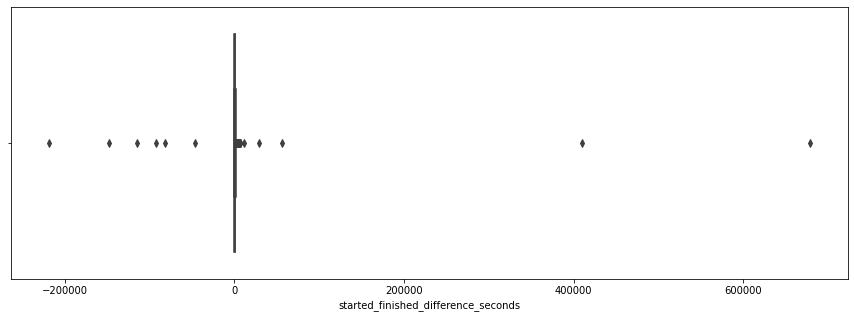

In [31]:
sns.boxplot(jobs.started_finished_difference_seconds)

No job should have negative duration

In [33]:
negative_duration_job = jobs[jobs.started_finished_difference_seconds < 0]

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='state', ylabel='count'>

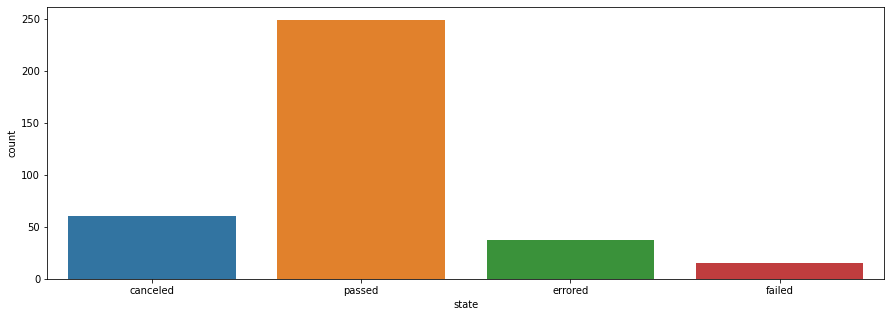

In [36]:
sns.countplot(negative_duration_job.state)

In [38]:
negative_duration_job[negative_duration_job.state == "passed"].head(2)

,id,buildid,started_at,created_at,finished_at,number,state,updated_at,commitsha,commitid,commitmessage,commitref,commitcompare_url,started_at_day,started_at_month,started_at_year,started_finished_difference_seconds
4416,213008250,213008248,2017-03-20 14:37:52+00:00,2017-03-20 14:34:12.603000+00:00,2017-03-20 14:35:08+00:00,20236.2,passed,2018-06-02T03:29:34.311Z,89adbc0c9146aaf2fa5838c0e6759b4e65d4988c,61228300,SONAR-8857 inline QProfileService.activate,refs/heads/feature/daniel/SONAR-8857/deactivat...,https://github.com/SonarSource/sonarqube/compa...,20.0,3.0,2017.0,-164.0
5256,131680516,131680515,2016-05-20 12:13:19+00:00,2016-05-20 12:13:08.672000+00:00,2016-05-20 12:13:12+00:00,10483.1,passed,2018-05-30T15:29:22.555Z,3b5a012004c1fdaf192e479e2bbe4543578a8749,37294628,Fix copyright.txt and remove useless COPYING file,refs/heads/master,https://github.com/SonarSource/sonarqube/compa...,20.0,5.0,2016.0,-7.0


In [43]:
negative_duration_jobs_buildid = negative_duration_job.buildid

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='state', ylabel='count'>

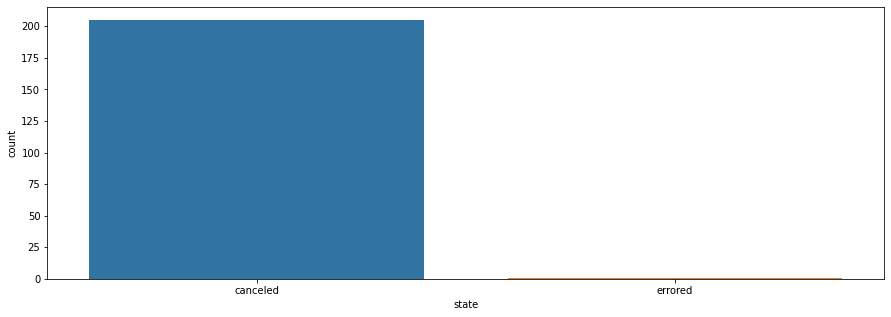

In [45]:
sns.countplot(builds[builds.id.isin(negative_duration_jobs_buildid)].state)

**Are jobs finished_at the same as the ones for the canceled builds?**

In [51]:
negative_duration_job_build_merged = negative_duration_job.merge(builds[["id", "finished_at"]], left_on="buildid", right_on="id", suffixes=["_job", "_build"])
negative_duration_job_build_merged.head(2)

,id_job,buildid,started_at,created_at,finished_at_job,number,state,updated_at,commitsha,commitid,commitmessage,commitref,commitcompare_url,started_at_day,started_at_month,started_at_year,started_finished_difference_seconds,id_build,finished_at_build
0,241946103,241946099,2017-06-12 09:22:43+00:00,2017-06-12 09:13:51.107000+00:00,2017-06-12 09:21:43+00:00,25614.2,canceled,2018-06-02T14:51:19.764Z,2e4b539138fde6f664a865c81fb6ab0763f74bdb,70181895,SONAR-9304 Add test on organization deletion,refs/heads/feature/atlas/MMF-324/builtin-profiles,https://github.com/SonarSource/sonarqube/compa...,12.0,6.0,2017.0,-60.0,241946099,2017-06-12 09:21:43+00:00
1,209801442,209801441,2017-03-10 16:13:46+00:00,2017-03-10 16:13:32.130000+00:00,2017-03-10 16:13:43+00:00,19737.1,canceled,2018-06-02T02:26:41.235Z,2ede936840467c48c984c5e928902b8b856db02b,60243245,"SONAR-8930 When removing a user, remove him fr...",refs/heads/feature/jl/associate_new_users_to_d...,https://github.com/SonarSource/sonarqube/compa...,10.0,3.0,2017.0,-3.0,209801441,2017-03-10 16:13:43+00:00


In [57]:
negative_duration_job_build_merged = negative_duration_job.merge(builds[["id", "finished_at"]], left_on="buildid", right_on="id", suffixes=["_job", "_build"])
negative_duration_job_build_merged.head(2)

,id_job,buildid,started_at,created_at,finished_at_job,number,state,updated_at,commitsha,commitid,commitmessage,commitref,commitcompare_url,started_at_day,started_at_month,started_at_year,started_finished_difference_seconds,id_build,finished_at_build
0,241946103,241946099,2017-06-12 09:22:43+00:00,2017-06-12 09:13:51.107000+00:00,2017-06-12 09:21:43+00:00,25614.2,canceled,2018-06-02T14:51:19.764Z,2e4b539138fde6f664a865c81fb6ab0763f74bdb,70181895,SONAR-9304 Add test on organization deletion,refs/heads/feature/atlas/MMF-324/builtin-profiles,https://github.com/SonarSource/sonarqube/compa...,12.0,6.0,2017.0,-60.0,241946099,2017-06-12 09:21:43+00:00
1,209801442,209801441,2017-03-10 16:13:46+00:00,2017-03-10 16:13:32.130000+00:00,2017-03-10 16:13:43+00:00,19737.1,canceled,2018-06-02T02:26:41.235Z,2ede936840467c48c984c5e928902b8b856db02b,60243245,"SONAR-8930 When removing a user, remove him fr...",refs/heads/feature/jl/associate_new_users_to_d...,https://github.com/SonarSource/sonarqube/compa...,10.0,3.0,2017.0,-3.0,209801441,2017-03-10 16:13:43+00:00


In [58]:
(negative_duration_job_build_merged.finished_at_build == \
                                  negative_duration_job_build_merged.finished_at_job)\
.sum() / len(negative_duration_job_build_merged)

0.775623268698061

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

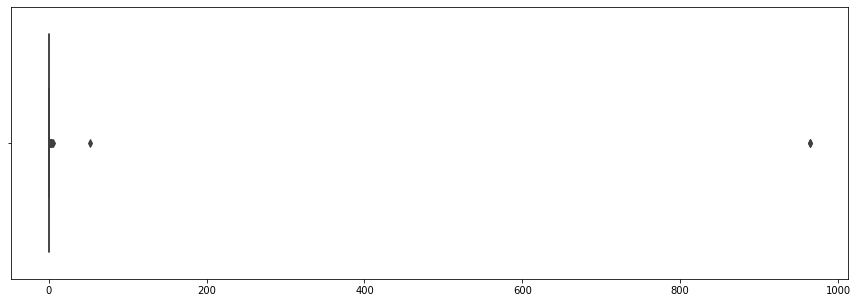

In [59]:
sns.boxplot((negative_duration_job_build_merged.finished_at_build - \
                                  negative_duration_job_build_merged.finished_at_job) / np.timedelta64(1, "s"))

In [64]:
negative_duration_job_build_merged["finished_at_build_job_difference"] = ((negative_duration_job_build_merged.finished_at_build - \
                                  negative_duration_job_build_merged.finished_at_job) / np.timedelta64(1, "s"))

In [67]:
negative_duration_job_build_merged.loc[negative_duration_job_build_merged.finished_at_build_job_difference.idxmax()]

id_job                                                                         193106385
buildid                                                                        193106381
started_at                                                     2017-01-18 16:49:59+00:00
created_at                                              2017-01-18 16:48:46.564000+00:00
finished_at_job                                                2017-01-18 16:49:57+00:00
number                                                                           17038.4
state                                                                           canceled
updated_at                                                      2018-06-01T20:45:54.373Z
commitsha                                       29a8d73d1b3fb39fd35c777bf07be40873391517
commitid                                                                        55186085
commitmessage                                                              Release 5.6.5
commitref            

* Jobs with negative duration are entirely due to canceled builds (and a few errored). In 77% of the cases builds were canceled at the finished_at time of the job, probably jobs were scheduled and run anyway giving a started_at greater than the finished one.
* We know that jobs from canceled builds have unreliable started and finished timestamps

**Canceld builds have all jobs with negative duration?** No

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='started_finished_difference_seconds'>

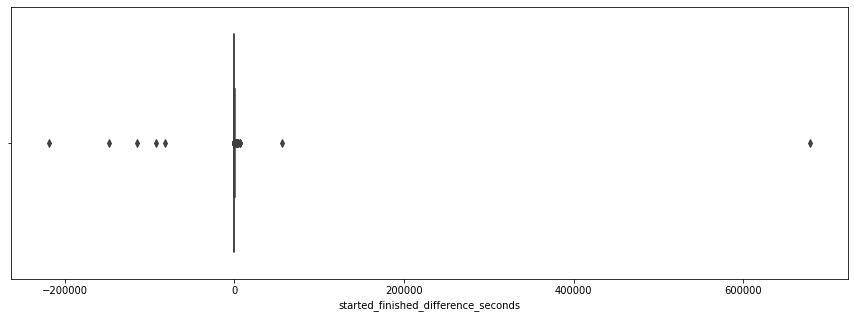

In [72]:
sns.boxplot(jobs[jobs.buildid.isin(builds[builds.state=="canceled"].id)].started_finished_difference_seconds)

**Passed or failed builds have jobs with positive duration?**

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='started_finished_difference_seconds'>

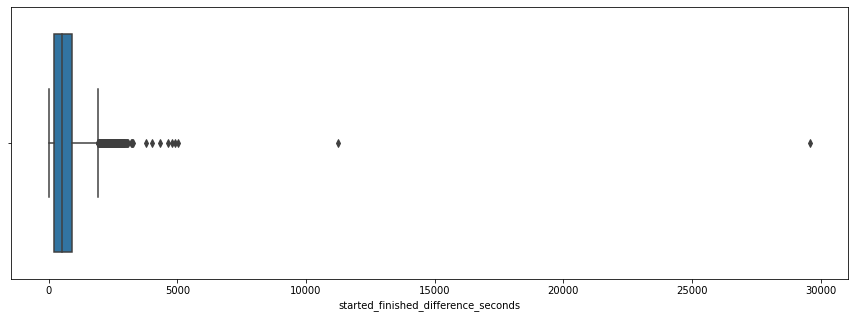

In [73]:
sns.boxplot(jobs[jobs.buildid.isin(builds[builds.state.isin(["passed", "failed"])].id)].started_finished_difference_seconds)

In [74]:
jobs[jobs.buildid.isin(builds[builds.state.isin(["passed", "failed"])].id)].started_finished_difference_seconds.min()

4.0

* We confirm that passed or failed builds have all jobs with positive duration

### Commitmessage

In [274]:
jobs[jobs.commitmessage.isna()]

,id,buildid,started_at,created_at,finished_at,number,state,updated_at,commitsha,commitid,commitmessage,commitref,commitcompare_url,started_at_day,started_at_month,started_at_year,started_created_difference_seconds
59249,150234433,150234432,2016-08-06 07:29:11+00:00,2016-08-06 07:28:58.905000+00:00,2016-08-06 07:48:38+00:00,12274.1,passed,2018-05-31T05:25:54.414Z,c106e1771ef95d5e6d2b12364db46e5d8db6d099,42662386,NaN,refs/pull/1135/merge,https://github.com/SonarSource/sonarqube/pull/...,6.0,8.0,2016.0,12.095
59250,150234434,150234432,2016-08-06 07:29:11+00:00,2016-08-06 07:28:58.928000+00:00,2016-08-06 07:30:23+00:00,12274.2,passed,2018-05-31T05:25:54.560Z,c106e1771ef95d5e6d2b12364db46e5d8db6d099,42662386,NaN,refs/pull/1135/merge,https://github.com/SonarSource/sonarqube/pull/...,6.0,8.0,2016.0,12.072


* We checked github for the commitsha but it does not exist anymore on Github
* We checked the raw JSON response from TravisAPI and the commit appears to have a null commitmessage